In [1]:
## Canny edge detection
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import argparse
from PIL import Image

In [121]:
# Generate edged detected figures, from blender renders (whitout mas)
# get the path/directory
folder_dir = 'Test_Images'
 
# iterate over files in
# that directory
for images in glob.iglob(f'{folder_dir}/*'):
   
    # check if the image ends with png
    if (images.endswith(".png")):
        img = cv2.imread(images)
        edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)
        plt.imsave(images + '_edged' + '.png' , edges, cmap='gray', format='png')
       



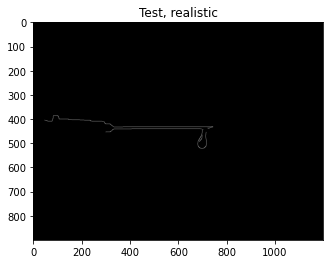

In [11]:
## Testing CELL realistic figure
image = cv2.imread('0_Drop-of-vaccine-on-needle-of-syringe.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edges = cv2.Canny(blurred, 400, 700, 3, L2gradient=True)

plt.figure()
plt.title('Test, realistic')
plt.imsave('Realistic_test.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

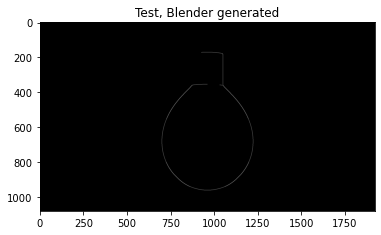

In [3]:
## Testing CELL rendered figure
image = cv2.imread('Test_Images\drop_s100_v15_r0.5_str5_pos2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edges = cv2.Canny(blurred, 70, 70, 3, L2gradient=True)

plt.figure()
plt.title('Test, Blender generated')
plt.imsave('Blender_test.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

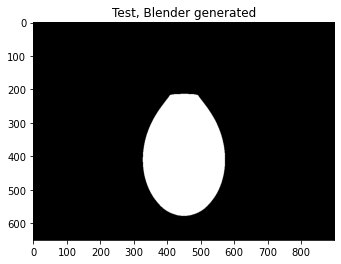

In [4]:
# Test masking settings
# Select blue from figure
high_gray = np.array([128, 255, 255])
low_gray = np.array([90, 50, 70])

img = cv2.resize(image, (900, 650), interpolation=cv2.INTER_CUBIC)

# convert BGR to HSV
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# create the Mask
mask = cv2.inRange(imgHSV, low_gray, high_gray)

# Do edge detection on "cleaned figure"
edges = cv2.Canny(mask, 100, 200, 3, L2gradient=True)

plt.figure()
plt.title('Test, Blender generated')
plt.imsave('Blender_test.png', edges, cmap='gray', format='png')
plt.imshow(mask, cmap='gray')
plt.show()

In [8]:
# Edge detect whole data set
# Generate edged detected figures, from blender renders
# get the path/directory
folder_dir = 'Test_Images'
high_gray = np.array([128, 255, 255])
low_gray = np.array([90, 50, 70])

# iterate over files in
# that directory

for images in glob.iglob(f'{folder_dir}/*'):
   
    # check if the image ends with png
    if (images.endswith(".png")):
        img = cv2.imread(images)
        # convert BGR to HSV
        imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        # create the Mask
        mask = cv2.inRange(imgHSV, low_gray, high_gray) 

        edges = cv2.Canny(mask, 100, 200, 3, L2gradient=True)
        plt.imsave(images + '_edged' + '.png' , edges, cmap='gray', format='png')
       